In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns

### Problem#1 - Logistic regression

In [73]:
#Load the data

data = pd.read_csv('ex2data1.txt', header = None)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [75]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [76]:
data.columns=["Exam1", "Exam2", "Result"]

In [77]:
data["Result"].value_counts()

1    60
0    40
Name: Result, dtype: int64

In [78]:
X=data.iloc[:,:2]
y=data.iloc[:,2]

In [79]:
print(X.head())


       Exam1      Exam2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376


###### Visualizing the data

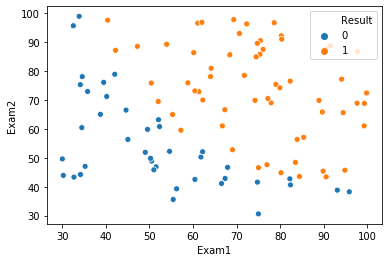

In [80]:
sns.scatterplot("Exam1", "Exam2", hue="Result", data=data)
plt.show()

###### sigmoid function

In [81]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

###### Cost computing function

In [82]:
def computeCost(theta, X, y):
    cost=(-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta)))+ np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return cost

###### Gradient descent function

In [83]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [84]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = computeCost(theta, X, y)
print(J)
print(m,n)

0.6931471805599453
100 2


###### Learning parameters using fmin_tnc

In [85]:
temp = opt.fmin_tnc(func = computeCost, x0 = theta.flatten(),fprime = gradient, args = (X, y.flatten()))

In [86]:
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)


[-25.16131862   0.20623159   0.20147149]


In [87]:
#Calculating optimized cost 

J = computeCost(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947464


###### Plotting decision boundary

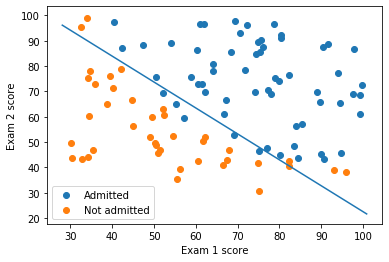

In [88]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

###### Calculating accuracy

In [93]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)

accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0


### Problem#2 - Regularized Regression

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [130]:
data = pd.read_csv('ex2data2.txt', header = None)


In [131]:
data.columns=["test1", "test2", "result"]

In [132]:
X=data.loc[:,"test1":"test2"]
y=data.loc[:,"result"]

In [133]:
X.head()

,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


###### Visualizing the data

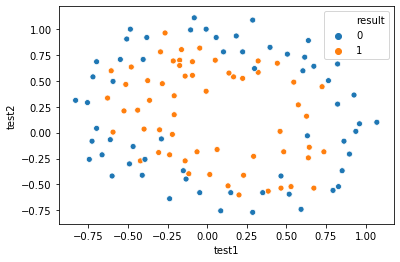

In [134]:
sns.scatterplot("test1", "test2", hue="result", data=data)
plt.show()

###### Feature mapping

In [135]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
X = mapFeature(X.iloc[:,0], X.iloc[:,1])

###### Sigmoid function

In [136]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

###### Cost Function

In [137]:
def lrCostFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

###### Gradient Function

In [138]:
def lrGradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

###### Computing cost using default thetas

In [139]:
(m, n) = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1
J = lrCostFunction(theta, X, y, lmbda)
print(J)


[[0.69314718]]


###### Finding optimized thetas

In [140]:
output = opt.fmin_tnc(func = lrCostFunction, x0 = theta.flatten(), fprime = lrGradientDescent, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
print(theta)

[ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.9174319  -1.43166925
  0.12393227 -0.36553117 -0.35725402 -0.17516291 -1.4581701  -0.05098417
 -0.61558548 -0.27469165 -1.19271297 -0.2421784  -0.20603293 -0.04466178
 -0.27778955 -0.29539513 -0.45645982 -1.04319155  0.02779373 -0.29244875
  0.01555762 -0.32742407 -0.1438915  -0.92467487]


###### Optimized cost using optimized thetas

In [141]:
J = lrCostFunction(theta[:,np.newaxis], X, y, lmbda)
print(J)

[[0.52900273]]


###### Calculating accuracy

In [125]:
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

###### Plotting decision boundary

In [126]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

KeyError: 0